<img src="images/picture1.png" alt="Drawing" style="width: 1000px;"/>

<a id='toc'></a>

### Table of Contents
* [0. Identify Business needs](#business)<br>
* [1. Import Data](#import) <br>
    * [1.1. Import the needed libraries](#lib)<br>
    * [1.2. Import and integrate data](#integrate)<br>
    * [1.3. Set index](#index)<br>
    * [1.4. Check for duplicates](#duplicates)<br>
* [2. Explore Data](#explore) <br>
    * [2.1. Basic Exploration](#basic)<br>
    * [2.2. Statistical Exploration](#stats)<br>
        * [2.2.1. Numerical Variables](#stats_num)<br>
        * [2.2.2. Categorical Variables](#stats_cat)<br>
    * [2.3. Visual Exploration](#visual)<br>
        * [2.3.1. Numerical Variables](#visual_num)<br>
        * [2.3.2. Categorical Variables](#visual_cat)<br>
    * [2.4. In-depth Exploration](#depth)<br>
* [3. Preprocess Data](#preprocess) <br>
    * [3.1. Data Cleaning](#clean)<br>
        * [3.1.1. Outliers](#outliers)<br>
        * [3.1.2. Missing Values](#missing)<br>
    * [3.2. Data Transformation](#transform)<br>
        * [3.2.1. Create new variables](#new)<br>
        * [3.2.2. Misclassifications](#misc)<br>
        * [3.2.3. Incoherencies](#inco)<br>
        * [3.2.4. Binning](#bin)<br>
        * [3.2.5. Reclassify](#rec)<br>
        * [3.2.6. Power Transform](#power)<br>
        * [3.2.7. Apply ordinal encoding and create Dummy variables](#dummy)<br>
        * [3.2.8. Scaling](#scale)<br>
    * [3.3. Data Reduction](#reduce)<br>
        * [3.3.1. Multicollinearity - Check correlation](#corr)<br>
        * [3.3.2. Unary Variables](#unary)<br>
        * [3.3.3. Variables with a high percentage of missing values](#na)<br>
        * [3.3.4. PCA](#pca)

<img src="images/process_ML.png" alt="Drawing" style="width: 1000px;"/>

<div class="alert alert-block alert-success">
<a id='business'>
<font color = '#006400'> 
    
# 0. Identify Business needs </font>
</a>
    
</div>

First of all, we need to identify well the business needs.

• Dig into the data and identify the variables that are crucial for distinguishing between
customers and their consumption behaviors. Thoroughly analyzing the data will enable your
team to identify key patterns and trends that will inform subsequent segmentation efforts.<br>
• Next, it is imperative that your team segments the company's customer database. The primary
objective of this exercise is to identify actionable segments that can be leveraged to enhance
the company's marketing efforts. The segmentation process will be informed by the data that
is available and will rely heavily on quantitative techniques. While customer value
segmentation and consuming behavior segmentation are two essential perspectives to
consider, other perspectives will be valued. Ultimately, the end goal of this project is to produce
a comprehensive report that identifies the main customer segments, accompanied by a
preliminary marketing plan that will serve as a guide for future initiatives.<br><br>

[BACK TO TOC](#toc)
    
<div class="alert alert-block alert-success">
<a id='import'>
<font color = '#006400'> 
    
# 1. Import Data </font>
</a>
    
</div>

<div class="alert alert-block alert-warning">

<a id='lib'></a>

## 1.1. Import the needed libraries
    
</div>

__`Step 1`__ Import the following libraries/functions: <br>
- pandas as pd <br>
    - <font color=#7a8a7c>_Pandas is a Python library for data manipulation and analysis, providing easy-to-use data structures and data analysis tools_</font>
- numpy as np <br>
    - <font color=#7a8a7c>_NumPy is a Python library for numerical computing that provides efficient arrays and matrices operations, as well as mathematical functions for arrays._</font>
- pyplot from matplotlib as plt <br>
    - <font color=#7a8a7c>_Matplotlib is a Python library for creating high-quality visualizations, including line plots, scatter plots, bar plots, and more, with extensive customization options._</font>
- seaborn as sns<br>
    - <font color=#7a8a7c>_Seaborn is a Python library for data visualization based on Matplotlib, providing additional high-level interface for creating informative statistical graphics with ease._</font>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn.preprocessing import LabelBinarizer

<div class="alert alert-block alert-warning">

<a id='integrate'></a>

## 1.2. Import and integrate data
    
</div>

__`Step 2`__ Import the excel files `crm.csv`, `mkt.csv`, `sales.xlsx` sorted and with index <br>

In [7]:
crm_df= pd.read_csv(r'crm.csv').sort_values(['CustomerID']).set_index(['CustomerID'])
mkt_df= pd.read_csv(r'mkt.csv').sort_values(['CustomerID']).set_index(['CustomerID'])
sales_df= pd.read_excel(r'sales.xlsx').sort_values(['CustomerID']).set_index(['CustomerID'])

__`Step 3`__ Join the data from the three previous files and store it in the object `df_join`. We are using join instead merge because we defined the index column before

In [8]:
df_join= crm_df.join(mkt_df)
df_join= df_join.join(sales_df)
df_join.head()

,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18,Response_Cmp1,Response_Cmp2,Response_Cmp3,...,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
CustomerID,,,,,,,,,,,,,,,,,,,,,
5078,Mr. Isaac Arnold,1969,Graduation,Together,99861.0,0,0,0,1,0,...,9240.0,2800.0,840.0,28.0,1,8,6,10,4,0
5081,Mr. Austin Abraham,1964,PhD,Divorced,124326.0,0,0,0,0,0,...,8760.0,1220.0,600.0,30.0,1,5,3,8,1,0
5084,Mrs. Bernadette Allan,1979,Master,Divorced,31179.0,1,0,1,0,0,...,150.0,0.0,200.0,27.0,3,4,3,2,7,0
5087,Mrs. Kylie Russell,1969,PhD,Divorced,102929.0,0,1,0,0,0,...,2520.0,1060.0,880.0,133.0,3,9,4,13,5,0
5090,Mr. Julian Arnold,1975,Master,Married,101038.0,0,1,0,0,0,...,4770.0,900.0,900.0,216.0,1,11,8,11,6,0


<div class="alert alert-block alert-warning">

<a id='duplicates'></a>

## 1.4. Check for duplicates
    
</div>

__`Step 6`__ Drop any duplicate rows present in the dataframe with the method `drop_duplicates()`

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html <br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html

In [10]:
df[df.duplicated()]

NameError: name 'df' is not defined

In [ ]:
df.drop_duplicates(inplace = True)
df

,Year_Birth,Gender,Education,Marital_Status,Dependents,Income,Country,City,Rcn,Frq,Mnt,Clothes,Kitchen,SmallAppliances,HouseKeeping,Toys,NetPurchase,StorePurchase,Recomendation,Credit_Card
Custid,,,,,,,,,,,,,,,,,,,,
1003,1996,M,Graduation,NaN,1,29761.20,Portugal,NaN,69,11,45.76,32.0,19,24,1,24,59,41,3,NaN
1004,1961,M,Master,Married,1,98249.55,Portugal,NaN,10,26,923.52,60.0,10,19,6,5,35,65,5,NaN
1006,1988,F,PhD,Together,1,23505.30,Portugal,NaN,65,14,58.24,47.0,2,48,2,1,67,33,4,NaN
1007,1975,F,Graduation,Single,1,72959.25,Portugal,NaN,73,18,358.80,71.0,7,13,1,8,46,54,4,NaN
1009,1946,F,Graduation,Married,0,114973.95,Portugal,NaN,75,30,1457.04,38.0,9,35,9,9,17,83,5,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10989,2001,F,Basic,Single,1,29551.20,Portugal,NaN,41,10,47.84,11.0,40,24,22,2,59,41,3,NaN
10991,1945,F,Graduation,Married,0,132566.70,Portugal,NaN,36,46,2320.24,32.0,4,47,9,8,22,78,6,NaN
10993,1960,F,Graduation,Together,0,91768.95,Portugal,NaN,1,25,870.48,56.0,8,27,8,1,47,53,4,NaN


[BACK TO TOC](#toc)
    
<div class="alert alert-block alert-success">
<a id='explore'>
<font color = '#006400'> 
    
# 2. Explore Data </font>
</a>
    
</div>
    
<img src="images/phase03.png" alt="Drawing" style="width: 500px;"/>

<div class="alert alert-block alert-warning">

<a id='basic'></a>

## 2.1. Basic Exploration
    
</div>

__`Step 7`__ Check the number of rows and columns in the dataset using the attribute `shape`

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html

In [ ]:
df.shape

(2500, 20)

Our dataset contains 2500 rows and 20 columns.

__`Step 8`__ Check the name of the columns of our dataset using the attribute `columns`

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html

In [ ]:
df.columns

Index(['Year_Birth', 'Gender', 'Education', 'Marital_Status', 'Dependents',
       'Income', 'Country', 'City', 'Rcn', 'Frq', 'Mnt', 'Clothes', 'Kitchen',
       'SmallAppliances', 'HouseKeeping', 'Toys', 'NetPurchase',
       'StorePurchase', 'Recomendation', 'Credit_Card'],
      dtype='object')

__`Step 9`__ Check the first three rows of the dataset using the method `head()`

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html

In [ ]:
df.head(3)

,Year_Birth,Gender,Education,Marital_Status,Dependents,Income,Country,City,Rcn,Frq,Mnt,Clothes,Kitchen,SmallAppliances,HouseKeeping,Toys,NetPurchase,StorePurchase,Recomendation,Credit_Card
Custid,,,,,,,,,,,,,,,,,,,,
1003,1996,M,Graduation,NaN,1,29761.20,Portugal,NaN,69,11,45.76,32.0,19,24,1,24,59,41,3,NaN
1004,1961,M,Master,Married,1,98249.55,Portugal,NaN,10,26,923.52,60.0,10,19,6,5,35,65,5,NaN
1006,1988,F,PhD,Together,1,23505.30,Portugal,NaN,65,14,58.24,47.0,2,48,2,1,67,33,4,NaN


In the same way, you have the method `tail()` that return the last rows of the dataset.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html

__`Step 10`__ Get more information of the dataset by calling the method `info()`

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 1003 to 10997
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year_Birth       2500 non-null   int64  
 1   Gender           2500 non-null   object 
 2   Education        2493 non-null   object 
 3   Marital_Status   2483 non-null   object 
 4   Dependents       2500 non-null   int64  
 5   Income           2431 non-null   float64
 6   Country          2500 non-null   object 
 7   City             73 non-null     object 
 8   Rcn              2500 non-null   int64  
 9   Frq              2500 non-null   int64  
 10  Mnt              2500 non-null   float64
 11  Clothes          2495 non-null   float64
 12  Kitchen          2500 non-null   int64  
 13  SmallAppliances  2500 non-null   int64  
 14  HouseKeeping     2500 non-null   int64  
 15  Toys             2500 non-null   int64  
 16  NetPurchase      2500 non-null   int64  
 17  StorePurch

We can verify that we are working with:
- 3 float variables
- 11 integer variables
- 6 object variables

We can also check that some of the variables have missing values. We are going to deal with this in a further step.

<div class="alert alert-block alert-warning">

<a id='stats'></a>

## 2.2. Statistical Exploration
    
</div>

<div class="alert alert-block alert-info">
    
<a id='stats_num'></a>

### 2.3.1. Numerical Variables
    
</div>

__`Step 11`__ Get the main descriptive statistics for all the numeric variables in using the method `describe()`

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

In [ ]:
df.describe()
# df.describe().T

,Year_Birth,Dependents,Income,Rcn,Frq,Mnt,Clothes,Kitchen,SmallAppliances,HouseKeeping,Toys,NetPurchase,StorePurchase,Recomendation
count,2500.000000,2500.000000,2431.000000,2500.000000,2500.000000,2500.000000,2495.000000,2500.000000,2500.000000,2500.00000,2500.00000,2500.000000,2500.000000,2500.000000
mean,1971.737200,0.701200,74062.838873,62.938400,19.989200,654.829760,51.010822,6.958800,28.233200,6.88080,6.92920,42.077600,57.922400,3.952800
std,17.046019,0.457824,28807.225833,69.643494,10.951249,676.453079,23.375793,7.836738,12.617674,7.63363,7.92094,18.274582,18.274582,1.141531
min,1942.000000,0.000000,10500.000000,0.000000,3.000000,8.320000,2.000000,0.000000,2.000000,0.00000,0.00000,5.000000,12.000000,1.000000
25%,1957.000000,0.000000,51013.725000,27.000000,11.000000,66.560000,33.500000,2.000000,19.000000,2.00000,1.00000,27.000000,43.000000,3.000000
50%,1971.000000,1.000000,74525.850000,53.000000,18.000000,401.960000,51.000000,4.000000,27.000000,4.00000,4.00000,45.000000,55.000000,4.000000
75%,1986.000000,1.000000,97300.875000,78.000000,28.000000,1069.120000,70.000000,9.000000,37.000000,9.00000,10.00000,57.000000,73.000000,5.000000
max,2002.000000,1.000000,144204.900000,549.000000,58.000000,3055.520000,98.000000,68.000000,69.000000,54.00000,77.00000,88.000000,95.000000,6.000000


From the above table, we can get some conclusions. Some examples are:
- `count`- The income variable has 2431 valid values. We have a problem of missing values in here.
- `mean`- In average, my customers spent on my store 654 monetary units;
- `std`- The standard deviation of Income is quite high. This indicates that the values are spread out over a wider range.
- `min`- All the customers have bought in my store at least 3 times.
- `50%`- Half of my customers spend till 402 monetary units on my store.
- `max`- The maximum value for recommendation is 6. This is an incoherence - according to the business needs, the range is between 1 and 5.

The `describe()` method provides the main descriptive statistics: count, mean, standard deviation, minimum value, 25 percentile, 50 percentile or median, 75 percentile and maximum value. 
<br>
However, you can call directly other measures, such as the skewness or the kurtosis.

__`Step 12`__ Get the skewness associated with each variable in the dataset using the method `skew()`

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.skew.html

In [ ]:
df.skew()

/var/folders/zb/r83qxb_974vbg2bs9xjz4yvh0000gp/T/ipykernel_39244/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Year_Birth         0.066038
Dependents        -0.879645
Income            -0.008810
Rcn                4.078153
Frq                0.703346
Mnt                0.991759
Clothes           -0.074810
Kitchen            2.192946
SmallAppliances    0.319840
HouseKeeping       2.013936
Toys               2.408100
NetPurchase       -0.241966
StorePurchase      0.241966
Recomendation     -0.112705
dtype: float64

Concerning the variables' skewness, we can conclude the following:
- `Moderate skewness (between |0.5| and |1.0|)`: Dependents, Frq, Mnt, 
- `High skewness (higher than |1.0|)`: Rcn, Kitchen, HouseKeeping, Toys

__`Step 13`__ Get the kurtosis associated with the variable `Rcn` using the method `kurt()`

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.kurt.html

In [ ]:
df[['Rcn','Kitchen']].kurt()

Rcn        20.083685
Kitchen     6.858773
dtype: float64

High kurtosis in a data set is an indicator that data has heavy tails or outliers. A standard normal distribution has a kurtosis of 3, so values higher than that could indicate presence of outliers.
We need to check further this variable about the presence of possible outliers.

<div class="alert alert-block alert-info">
    
<a id='stats_cat'></a>

### 2.3.2. Categorical Variables
    
</div>

__`Step 14`__ Get the main descriptive statistics for all the categorical variables in using the method `describe(include = ['O'])`

In [ ]:
df.describe(include = ['O'])

,Gender,Education,Marital_Status,Country,City,Credit_Card
count,2500,2493,2483,2500,73,67
unique,3,6,9,1,1,2
top,F,Graduation,Married,Portugal,Lisbon,No
freq,1910,1224,915,2500,73,35


We can verify some problems or issues that we need to address before applying a model:
- We have 3 possible values for Gender, 6 for Education and 9 for Marital Status: we need to check further if all those values are acceptable;
- The variable country is unary - we only have one possible value;
- The variable city has also one possible value and it has only 73 rows filled. Maybe we should drop this variable.
- The credit card has only 67 values out of 2500 filled. 

__`Step 15`__ Check the levels/possible values in the variables "Gender", "Education" and "Marital_Status" using the method `value_counts()`

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html

In [ ]:
df['Gender'].value_counts()

F    1910
M     585
?       5
Name: Gender, dtype: int64

We have 5 observations with a value of "?". We need to change this value, since it is not a valid value.

In [ ]:
df['Education'].value_counts()

Graduation    1224
2n Cycle       425
Master         372
Basic          299
PhD            167
OldSchool        6
Name: Education, dtype: int64

We have some problems in this variable: <br>
- OldSchool is not a valid value;<br>
- Not clear what is 2n Cycle and Basic Education. <br>
      
We need to make some transformations in this variable also.

In [ ]:
df['Marital_Status'].value_counts()

Married         915
Together        604
Single          596
Divorced        230
Widow           115
BigConfusion     19
TOGETHER          2
MARRIED           1
DIVORCED          1
Name: Marital_Status, dtype: int64

It seems that this variable needs also some transformations: <br>
- Together, Married and Divorced are written sometimes using capital letters;<br>
- BigConfusion is not a valid value;<br>
- Does it make sense to have Together and Married into two different levels?

In [ ]:
df['Country'].value_counts()

Portugal    2500
Name: Country, dtype: int64

In country, there are no missing values, but the value is always the same. It does not make sense to keep this variable to the modelling phase.

In [ ]:
df['City'].value_counts()

Lisbon    73
Name: City, dtype: int64

In city, we have a significant quantity of values that are missing, and the city is always the same. Assuming that there is no reason behind the missingness on this variable, we are going to delete this variable in a further step.

In [ ]:
df['Credit_Card'].value_counts()

No     35
Yes    32
Name: Credit_Card, dtype: int64

In the variable Credit Card, we also have a significant number of missing values. Assuming that there is a reason behind the missingness, we are going to fill all the missing values with a constant.

<div class="alert alert-block alert-warning">

<a id='visual'></a>

## 2.3. Visual Exploration
    
</div>    

<div class="alert alert-block alert-info">
    
<a id='visual_num'></a>

### 2.3.1. Numerical Variables
    
</div>

__`Step 16`__ Check the distribution of the variable 'Mnt' using a `histplot()`. Define the color as green and the number of bins equal to 10.

https://seaborn.pydata.org/generated/seaborn.histplot.html

<AxesSubplot: xlabel='Mnt', ylabel='Count'>

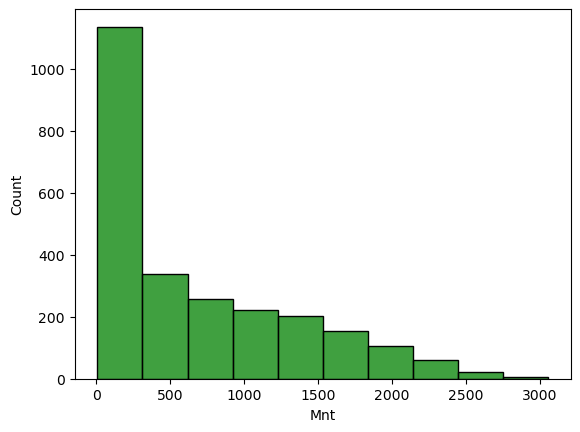

In [ ]:
sns.histplot(data = df, x = 'Mnt', color="g", bins = 10)

__`Step 17`__ Create a `scatterplot` where the x axis represent the Income and the y axis define the Mnt spent for each customer using `seaborn`.

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<AxesSubplot: xlabel='Income', ylabel='Mnt'>

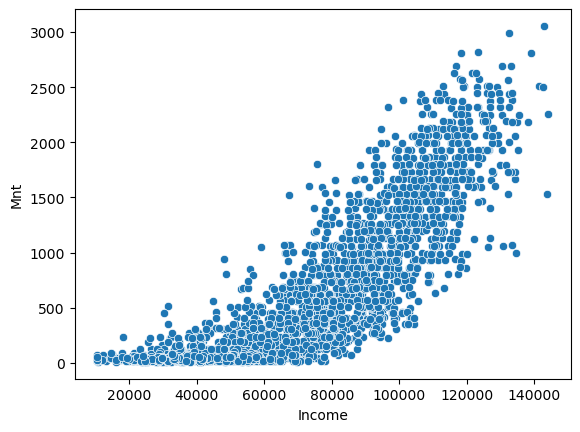

In [ ]:
sns.scatterplot(data = df, x = 'Income', y= 'Mnt')

We can clearly see that the higher the Income, the higher the monetary spent on our store.
In this case have a positive correlation

__`Step 17.B`__ This time, create a scatterplot similar to the previous one, but with the following changes:
- Define a figure with size equal to (12,8), and composed by two axes.
- The first axe is going to contain a scatterplot similar to the one on the previous step-
- The second axe will display a scatterplot where the x axis will define the Income and the y axis will represent the Mnt. Use the parameter hue to represent a third variable, the recomendation.
- Define the lower limit of y as -200
- Define the lower limit of x as 0
- Define the ticks of the x axis between 0 and 160000, in steps of 30000
- Define the title of the plot as "Income vs Monetary vs Recomendation", with a fontsize of 16 and a blue color
- The legend of the plot should be on the upper left area and the title of the legend should be "Recomendation"
- Define the label of the x axis as "Customer's Income"
- Remove the top and right axis of the plot
- Save the figure as "my_plot.png", with a resolution of 300 dots per inch and with no background.

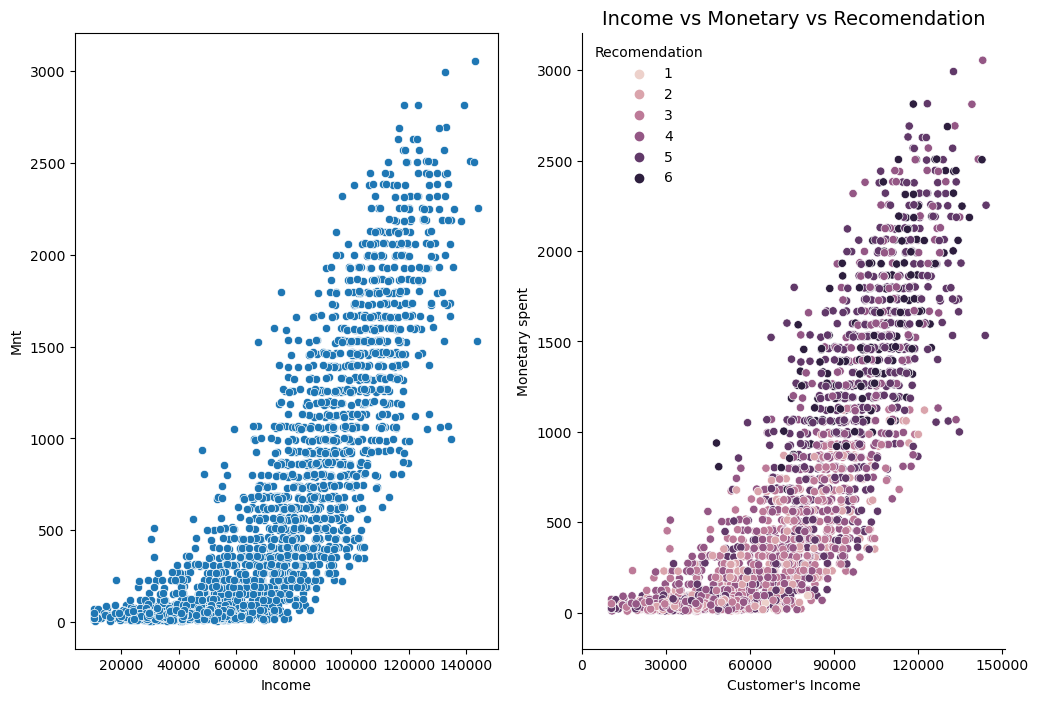

In [ ]:
# Define the size of the figure as (12,8)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,8))

# create first plot without changes, similar to step 17
sns.scatterplot(ax = ax1, data = df, x = 'Income', y = 'Mnt')

# create second plot with changes
sns.scatterplot(ax = ax2, data = df, x = 'Income', y = 'Mnt', hue = 'Recomendation')

# define the limits of y axis using matplotlib.pyplot.ylim
plt.ylim(-200,None)
# define the limits of x axis using matplotlib.pyplot.xlim
plt.xlim(0,None)

# define the ticks in x axis using matplotlib.pyplot.xticks(start, stop, step)
# np.arange - Return evenly spaced values within a given interval.
plt.xticks(np.arange(0,160000,30000))

# define the title using matplotlib.pyplot.title
plt.title('Income vs Monetary vs Recomendation', fontsize= 14, color = 'black')

# define the legend using matplotlib.pyplot.legend
plt.legend(loc = 'upper left', title = 'Recomendation', frameon = False)

# define the label for x axis using matplotlib.pyplot.xlabel
plt.xlabel("Customer's Income")
plt.ylabel("Monetary spent")

# Remove the top and right axis of the plot
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Save the figure as "my_plot.png", with a resolution of 300 dots per inch and with no background.
plt.savefig('my_plot.png', dpi = 300, transparent = True)

__`Step 18`__ Plot the pairwise relationships of the variables "Clothes", "Toys" and "HouseKeeping" using a `pairplot`

https://seaborn.pydata.org/generated/seaborn.pairplot.html

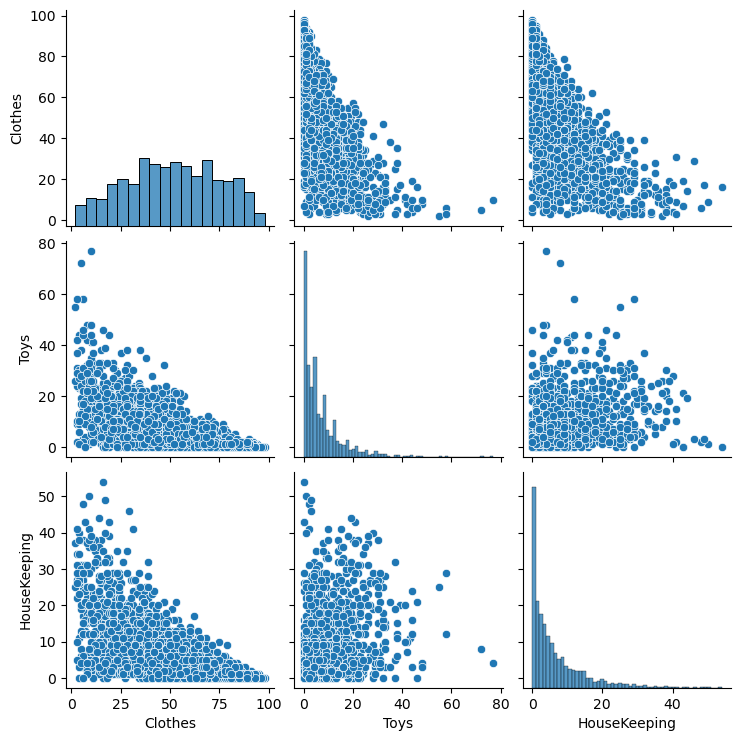

In [ ]:
df_subset = df[['Clothes', 'Toys', 'HouseKeeping']].copy()
sns.pairplot(df_subset)

__`Step 19`__ Check the spearman correlation between numerical variables using the method `corr(method = 'spearman')`.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html <br>
https://seaborn.pydata.org/generated/seaborn.heatmap.html

<AxesSubplot: >

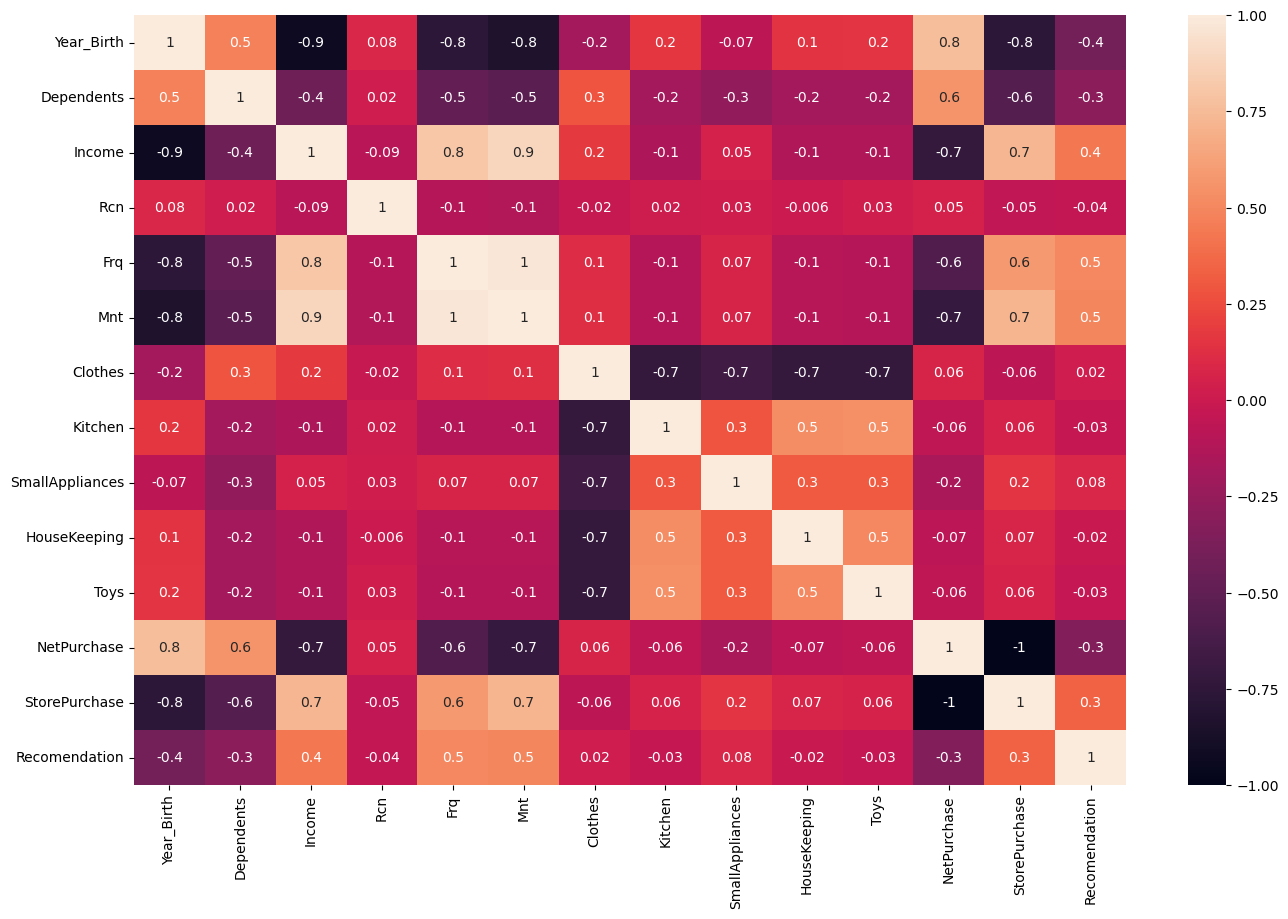

In [ ]:
df_corr = df.corr(method = 'spearman')
figure = plt.figure(figsize=(16,10))
sns.heatmap(df_corr, annot=True, fmt = '.1g')

We can verify that NetPurchase and StorePurchase have a perfect negative correlation. We don't need both variables. We are going to remove one of them in __`Step 41 `__ 

<div class="alert alert-block alert-info">

<a id='visual_cat'></a>
    
### 2.3.2. Categorical Variables

</div>

__`Step 20`__ Show the counts of observations in each categorical bin using bars for the variable "Marital_Status" using a `countplot()`.
Define the hue as "Gender". Show only the counting for Single, Divorced, Widow, Married and Together in this order.

https://seaborn.pydata.org/generated/seaborn.countplot.html

<AxesSubplot: xlabel='count', ylabel='Marital_Status'>

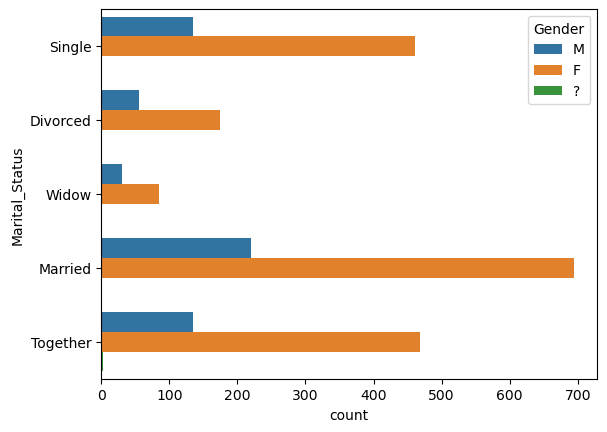

In [ ]:
sns.countplot(y = 'Marital_Status', hue = 'Gender', data = df,
             order = ['Single','Divorced','Widow','Married','Together'])

__`Step 21`__ Draw a scatterplot between Income (numerical variable) and Education (categorical variable) using the `stripplot()`

<AxesSubplot: xlabel='Income', ylabel='Education'>

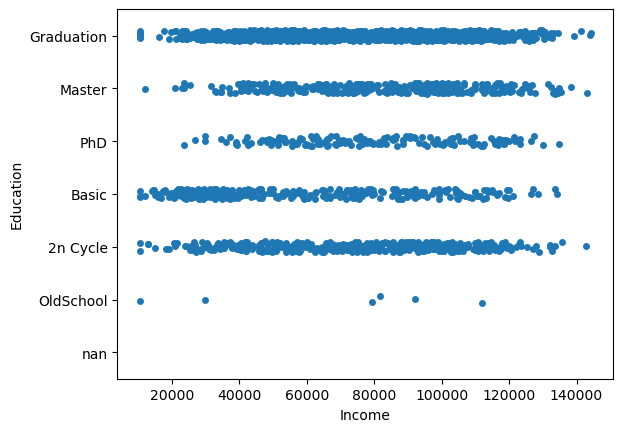

In [ ]:
sns.stripplot(x = 'Income', y = 'Education', data = df)

We cannot see significant differences on the money earned depending on the Education level.

<div class="alert alert-block alert-warning">

<a id='depth'></a>

## 2.4. In-depth Exploration
    
</div>

We can go further and try to understand better our population of study using the methods `groupby()` and `query()`

__`Step 22`__ What is the mean value of `Mnt` when `Dependents` is equal to 0? And when is equal to 1? Use `groupby()`.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html <br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html

In [ ]:
df.groupby('Dependents')['Mnt'].mean()

Dependents
0    1276.316680
1     389.997627
Name: Mnt, dtype: float64

__`Step 23`__ What is the median value of `Mnt` spent by female customers when `Dependents` is equal to 0? And when is equal to 1? Use `groupby()` and `query()`

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.median.html

In [ ]:
df.query('Gender == "F"').groupby('Dependents')['Mnt'].median()

Dependents
0    1333.28
1     195.52
Name: Mnt, dtype: float64

[BACK TO TOC](#toc)
    
<div class="alert alert-block alert-success">
<a id='preprocess'>
<font color = '#006400'> 
    
# 3. Preprocess Data </font>
</a>
    
</div>
    
<img src="images/phase04.png" alt="Drawing" style="width: 500px;"/>

<div class="alert alert-block alert-warning">

<a id='clean'></a>

## 3.1. Data Cleaning
    
</div>

<div class="alert alert-block alert-info">

<a id='outliers'></a>

### 3.1.1. Outliers
    
</div>

In __Step 13__ we understood that the variables "Rcn" and "Kitchen", due to the high kurtosis, could have potential outliers. In the following steps we are going to investigate further this possible situation.

__`Step 24`__ Create a figure with two axes, where the boxplots of the variables "Rcn" and "Kitchen" are shown. Use the `boxplot()` from seaborn. 

https://seaborn.pydata.org/generated/seaborn.boxplot.html

<AxesSubplot: xlabel='Kitchen'>

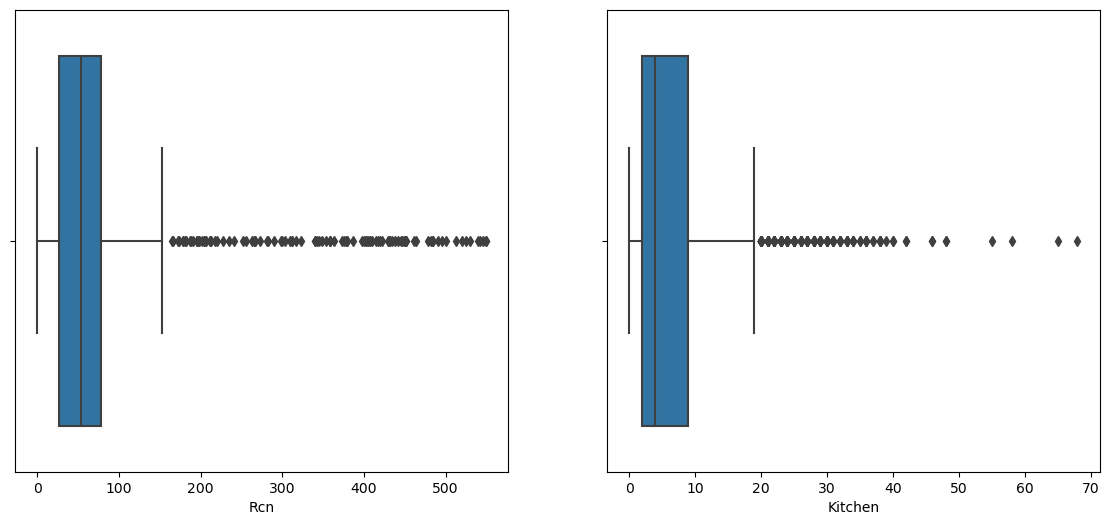

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14,6))
sns.boxplot(ax = ax1, data = df, x = 'Rcn')
sns.boxplot(ax = ax2, data = df, x = 'Kitchen')

__`Step 25`__ Create a figure with two axes, where the histplots of the variables "Rcn" and "Kitchen" are shown. Use the `histplot()` from seaborn. 

<AxesSubplot: xlabel='Kitchen', ylabel='Count'>

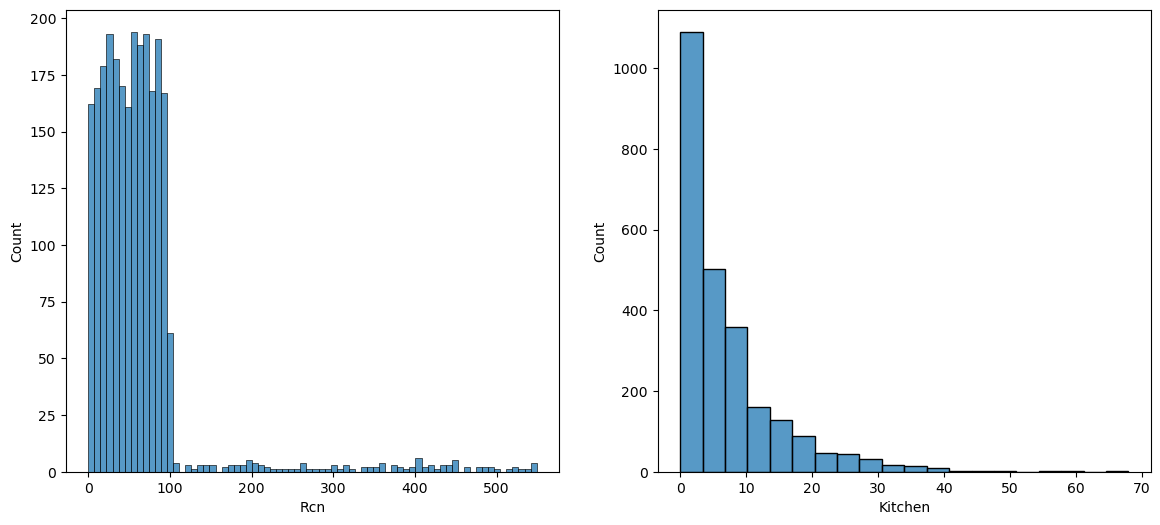

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14,6))
sns.histplot(ax = ax1, data = df, x = 'Rcn')
sns.histplot(ax = ax2, data = df, x = 'Kitchen', bins = 20)

__`Step 26`__ Remove the observations where Kitchen is higher than 50 using the method `drop()`.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

In [ ]:
df_no_outliers = df.drop(df[df['Kitchen'] > 50].index)
df_no_outliers

,Year_Birth,Gender,Education,Marital_Status,Dependents,Income,Country,City,Rcn,Frq,Mnt,Clothes,Kitchen,SmallAppliances,HouseKeeping,Toys,NetPurchase,StorePurchase,Recomendation,Credit_Card
Custid,,,,,,,,,,,,,,,,,,,,
1003,1996,M,Graduation,NaN,1,29761.20,Portugal,NaN,69,11,45.76,32.0,19,24,1,24,59,41,3,NaN
1004,1961,M,Master,Married,1,98249.55,Portugal,NaN,10,26,923.52,60.0,10,19,6,5,35,65,5,NaN
1006,1988,F,PhD,Together,1,23505.30,Portugal,NaN,65,14,58.24,47.0,2,48,2,1,67,33,4,NaN
1007,1975,F,Graduation,Single,1,72959.25,Portugal,NaN,73,18,358.80,71.0,7,13,1,8,46,54,4,NaN
1009,1946,F,Graduation,Married,0,114973.95,Portugal,NaN,75,30,1457.04,38.0,9,35,9,9,17,83,5,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10989,2001,F,Basic,Single,1,29551.20,Portugal,NaN,41,10,47.84,11.0,40,24,22,2,59,41,3,NaN
10991,1945,F,Graduation,Married,0,132566.70,Portugal,NaN,36,46,2320.24,32.0,4,47,9,8,22,78,6,NaN
10993,1960,F,Graduation,Together,0,91768.95,Portugal,NaN,1,25,870.48,56.0,8,27,8,1,47,53,4,NaN


<div class="alert alert-block alert-info">

<a id='missing'></a>

### 3.1.2. Missing Values
    
</div>

__`Step 27`__ Check how many missing values you have in the dataset using `isna().sum()`

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html <br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html

In [ ]:
df.isna().sum()

Year_Birth            0
Gender                0
Education             7
Marital_Status       17
Dependents            0
Income               69
Country               0
City               2427
Rcn                   0
Frq                   0
Mnt                   0
Clothes               5
Kitchen               0
SmallAppliances       0
HouseKeeping          0
Toys                  0
NetPurchase           0
StorePurchase         0
Recomendation         0
Credit_Card        2433
dtype: int64

#### 3.1.2.1 Fill with constant

__`Step 28`__ Fill the missing values in Credit_Card with the constant "Missing" using the method `fillna()`.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

In [ ]:
df['Credit_Card'].fillna('Missing', inplace = True)

In [ ]:
df['Credit_Card'].value_counts()

Missing    2433
No           35
Yes          32
Name: Credit_Card, dtype: int64

#### 3.1.2.2 Fill with mean / median / mode

__`Step 29`__ Fill the missing values in Marital Status and Education with the mode and in Income with median using `fillna()`

In [ ]:
df.fillna({
    'Education': df['Education'].mode()[0],
    'Marital_Status': df['Marital_Status'].mode()[0],
    'Income':df['Income'].median()
    }, inplace = True)

In [ ]:
df.isna().sum()/len(df)*100

Year_Birth          0.00
Gender              0.00
Education           0.00
Marital_Status      0.00
Dependents          0.00
Income              0.00
Country             0.00
City               97.08
Rcn                 0.00
Frq                 0.00
Mnt                 0.00
Clothes             0.20
Kitchen             0.00
SmallAppliances     0.00
HouseKeeping        0.00
Toys                0.00
NetPurchase         0.00
StorePurchase       0.00
Recomendation       0.00
Credit_Card         0.00
dtype: float64

#### 3.1.2.2 Fill with KNNImputer

__`Step 30`__ Use a predictive model to fill the missing values in Clothes. You can use the variables Kitchen, SmallAppliances, HouseKeeping and Toys, that have a correlation of -0.7 with clothes, to fill the missing values with KNNImputer.

In [ ]:
df_products = df[['Clothes','Kitchen','SmallAppliances','HouseKeeping','Toys']].copy()

imputer = KNNImputer(n_neighbors=1)
array_impute = imputer.fit_transform(df_products) # this is an array
df_products = pd.DataFrame(array_impute, columns = df_products.columns)

In [ ]:
df['Clothes'] = df_products['Clothes'].values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 1003 to 10997
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year_Birth       2500 non-null   int64  
 1   Gender           2500 non-null   object 
 2   Education        2500 non-null   object 
 3   Marital_Status   2500 non-null   object 
 4   Dependents       2500 non-null   int64  
 5   Income           2500 non-null   float64
 6   Country          2500 non-null   object 
 7   City             73 non-null     object 
 8   Rcn              2500 non-null   int64  
 9   Frq              2500 non-null   int64  
 10  Mnt              2500 non-null   float64
 11  Clothes          2500 non-null   float64
 12  Kitchen          2500 non-null   int64  
 13  SmallAppliances  2500 non-null   int64  
 14  HouseKeeping     2500 non-null   int64  
 15  Toys             2500 non-null   int64  
 16  NetPurchase      2500 non-null   int64  
 17  StorePurch

[BACK TO TOC](#toc)

<div class="alert alert-block alert-warning">

<a id='transform'></a>

## 3.2. Data Transformation
    
</div>

<div class="alert alert-block alert-info">

<a id='new'></a>

### 3.2.1. Create new variables
    
</div>

__`Step 31`__ Create the variable "Age" from the "Year_Birth".

In [ ]:
from datetime import date
df['Age'] = date.today().year - df['Year_Birth']
df

,Year_Birth,Gender,Education,Marital_Status,Dependents,Income,Country,City,Rcn,Frq,...,Clothes,Kitchen,SmallAppliances,HouseKeeping,Toys,NetPurchase,StorePurchase,Recomendation,Credit_Card,Age
Custid,,,,,,,,,,,,,,,,,,,,,
1003,1996,M,Graduation,Married,1,29761.20,Portugal,NaN,69,11,...,32.0,19,24,1,24,59,41,3,Missing,27
1004,1961,M,Master,Married,1,98249.55,Portugal,NaN,10,26,...,60.0,10,19,6,5,35,65,5,Missing,62
1006,1988,F,PhD,Together,1,23505.30,Portugal,NaN,65,14,...,47.0,2,48,2,1,67,33,4,Missing,35
1007,1975,F,Graduation,Single,1,72959.25,Portugal,NaN,73,18,...,71.0,7,13,1,8,46,54,4,Missing,48
1009,1946,F,Graduation,Married,0,114973.95,Portugal,NaN,75,30,...,38.0,9,35,9,9,17,83,5,Yes,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10989,2001,F,Basic,Single,1,29551.20,Portugal,NaN,41,10,...,11.0,40,24,22,2,59,41,3,Missing,22
10991,1945,F,Graduation,Married,0,132566.70,Portugal,NaN,36,46,...,32.0,4,47,9,8,22,78,6,Missing,78
10993,1960,F,Graduation,Together,0,91768.95,Portugal,NaN,1,25,...,56.0,8,27,8,1,47,53,4,Missing,63


__`Step 32`__ Create a new variable where the purpose is to understand how much money a customer spend on my store each time.

In [ ]:
df['MntFrq'] = df['Mnt']/df['Frq']
df

,Year_Birth,Gender,Education,Marital_Status,Dependents,Income,Country,City,Rcn,Frq,...,Kitchen,SmallAppliances,HouseKeeping,Toys,NetPurchase,StorePurchase,Recomendation,Credit_Card,Age,MntFrq
Custid,,,,,,,,,,,,,,,,,,,,,
1003,1996,M,Graduation,Married,1,29761.20,Portugal,NaN,69,11,...,19,24,1,24,59,41,3,Missing,27,4.160000
1004,1961,M,Master,Married,1,98249.55,Portugal,NaN,10,26,...,10,19,6,5,35,65,5,Missing,62,35.520000
1006,1988,F,PhD,Together,1,23505.30,Portugal,NaN,65,14,...,2,48,2,1,67,33,4,Missing,35,4.160000
1007,1975,F,Graduation,Single,1,72959.25,Portugal,NaN,73,18,...,7,13,1,8,46,54,4,Missing,48,19.933333
1009,1946,F,Graduation,Married,0,114973.95,Portugal,NaN,75,30,...,9,35,9,9,17,83,5,Yes,77,48.568000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10989,2001,F,Basic,Single,1,29551.20,Portugal,NaN,41,10,...,40,24,22,2,59,41,3,Missing,22,4.784000
10991,1945,F,Graduation,Married,0,132566.70,Portugal,NaN,36,46,...,4,47,9,8,22,78,6,Missing,78,50.440000
10993,1960,F,Graduation,Together,0,91768.95,Portugal,NaN,1,25,...,8,27,8,1,47,53,4,Missing,63,34.819200


<div class="alert alert-block alert-info">

<a id='misc'></a>

### 3.2.2. Misclassifications
    
</div>

__`Step 33`__ Review the counting for possible values in the Gender variable using `value_counts()`

In [ ]:
df['Gender'].value_counts()

F    1910
M     585
?       5
Name: Gender, dtype: int64

__`Step 33.B`__ Replace the "?" with the most frequent value using `mode()[0]`, which is going to return the most frequent value.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html

In [ ]:
df['Gender'] = df['Gender'].replace('?',df['Gender'].mode()[0])
df['Gender'].value_counts()

F    1915
M     585
Name: Gender, dtype: int64

__`Step 34`__ Review the counting for possible values in the Marital_Status variable with `value_counts()`

In [ ]:
df['Marital_Status'].value_counts()

Married         933
Together        606
Single          596
Divorced        231
Widow           115
Bigconfusion     19
Name: Marital_Status, dtype: int64

__`Step 34.B`__ Change "TOGETHER" to "Together" and do the same (Capitalize the words) for "DIVORCED" and "MARRIED" using `str.capitalize()`

In [ ]:
df['Marital_Status'] = df['Marital_Status'].str.capitalize() 
df['Marital_Status'].value_counts()

Married         933
Together        606
Single          596
Divorced        231
Widow           115
Bigconfusion     19
Name: Marital_Status, dtype: int64

__`Step 34.C`__ Replace the "BigConfusion" with the most frequent value.

In [ ]:
df['Marital_Status'] = df['Marital_Status'].replace('Bigconfusion',df['Marital_Status'].mode()[0])
df['Marital_Status'].value_counts()

Married     952
Together    606
Single      596
Divorced    231
Widow       115
Name: Marital_Status, dtype: int64

__`Step 35`__ Review the counting for possible values in the Education variable.

In [ ]:
df['Education'].value_counts()

__`Step 35.B`__ Replace the "OldSchool" with the most frequent value with `mode()[0]`.

In [ ]:
df['Education'] = df['Education'].replace('OldSchool',df['Education'].mode()[0])
df['Education'].value_counts()

Graduation    1237
2n Cycle       425
Master         372
Basic          299
PhD            167
Name: Education, dtype: int64

<div class="alert alert-block alert-info">

<a id='inco'></a>

### 3.2.3. Incoherencies
    
</div>

__`Step 36`__ Check possible incoherencies in your data. One situation that is impossible to happen is to have values of frequency equal to 0 when there was some money spent by the customer. Change those values of Frequency to 1.
    


In [ ]:
df.loc[(df['Mnt']>0) & (df['Frq'] == 0), 'Frq'] = 1

<div class="alert alert-block alert-info">

<a id='bin'></a>

### 3.2.4. Binning
    
</div>

__`Step 37`__ Create a new variable named as "Income_bins" where Income is going to be represented in thre possible values - "Low", "Medium" and "High". By using the method `cut()`, those are going to be equal-width bins.

https://pandas.pydata.org/docs/reference/api/pandas.cut.html

In [ ]:
df['Income_bins'] = pd.cut(df['Income'], 3, labels=["Low", "Medium", "High"])
df

,Year_Birth,Gender,Education,Marital_Status,Dependents,Income,Country,City,Rcn,Frq,...,SmallAppliances,HouseKeeping,Toys,NetPurchase,StorePurchase,Recomendation,Credit_Card,Age,MntFrq,Income_bins
Custid,,,,,,,,,,,,,,,,,,,,,
1003,1996,M,Graduation,Married,1,29761.20,Portugal,NaN,69,11,...,24,1,24,59,41,3,Missing,27,4.160000,Low
1004,1961,M,Master,Married,1,98249.55,Portugal,NaN,10,26,...,19,6,5,35,65,5,Missing,62,35.520000,Medium
1006,1988,F,PhD,Together,1,23505.30,Portugal,NaN,65,14,...,48,2,1,67,33,4,Missing,35,4.160000,Low
1007,1975,F,Graduation,Single,1,72959.25,Portugal,NaN,73,18,...,13,1,8,46,54,4,Missing,48,19.933333,Medium
1009,1946,F,Graduation,Married,0,114973.95,Portugal,NaN,75,30,...,35,9,9,17,83,5,Yes,77,48.568000,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10989,2001,F,Basic,Single,1,29551.20,Portugal,NaN,41,10,...,24,22,2,59,41,3,Missing,22,4.784000,Low
10991,1945,F,Graduation,Married,0,132566.70,Portugal,NaN,36,46,...,47,9,8,22,78,6,Missing,78,50.440000,High
10993,1960,F,Graduation,Together,0,91768.95,Portugal,NaN,1,25,...,27,8,1,47,53,4,Missing,63,34.819200,Medium


<div class="alert alert-block alert-info">

<a id='rec'></a>

### 3.2.5. Reclassify
    
</div>

__`Step 38`__ Due to the similarity of the classification, change the value "Together" to "Married" in Marital_Status using the method `replace()`.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html

In [ ]:
df['Marital_Status'] = df['Marital_Status'].replace('Together','Married')
df['Marital_Status'].value_counts()

Married     1558
Single       596
Divorced     231
Widow        115
Name: Marital_Status, dtype: int64

__`Step 39`__ Since we are not sure about what 2nd Cycle and Basic School means, we are going to create a new binary variable where if the customer has higher education we assign the value 1, and 0 otherwise.
Remove the variable "education".

In [ ]:
df['Higher_Educ'] = np.where((df['Education']=='Graduation')|
                               (df['Education']=='Master')|
                               (df['Education']=='PhD'),1,0)
df.drop('Education', axis = 1, inplace = True)
df

,Year_Birth,Gender,Marital_Status,Dependents,Income,Country,City,Rcn,Frq,Mnt,...,HouseKeeping,Toys,NetPurchase,StorePurchase,Recomendation,Credit_Card,Age,MntFrq,Income_bins,Higher_Educ
Custid,,,,,,,,,,,,,,,,,,,,,
1003,1996,M,Married,1,29761.20,Portugal,NaN,69,11,45.76,...,1,24,59,41,3,Missing,27,4.160000,Low,1
1004,1961,M,Married,1,98249.55,Portugal,NaN,10,26,923.52,...,6,5,35,65,5,Missing,62,35.520000,Medium,1
1006,1988,F,Married,1,23505.30,Portugal,NaN,65,14,58.24,...,2,1,67,33,4,Missing,35,4.160000,Low,1
1007,1975,F,Single,1,72959.25,Portugal,NaN,73,18,358.80,...,1,8,46,54,4,Missing,48,19.933333,Medium,1
1009,1946,F,Married,0,114973.95,Portugal,NaN,75,30,1457.04,...,9,9,17,83,5,Yes,77,48.568000,High,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10989,2001,F,Single,1,29551.20,Portugal,NaN,41,10,47.84,...,22,2,59,41,3,Missing,22,4.784000,Low,0
10991,1945,F,Married,0,132566.70,Portugal,NaN,36,46,2320.24,...,9,8,22,78,6,Missing,78,50.440000,High,1
10993,1960,F,Married,0,91768.95,Portugal,NaN,1,25,870.48,...,8,1,47,53,4,Missing,63,34.819200,Medium,1


<div class="alert alert-block alert-info">

<a id='power'></a>

### 3.2.6. Power Transform
    
</div>

__`Step 40`__ Create a new variable "sqrt_rcn" by applying a square root transformation to the variable "Rcn", in order to try to normalize the variable.

In [ ]:
df['sqrt_rcn'] = np.sqrt(df['Rcn'])

__`Step 40.B`__ Compare the distribution of the variables 'Rcn' and 'sqrt_rcn' with a histplot.

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14,6))
sns.histplot(ax = ax1, data = df, x = 'Rcn', bins = 10)
sns.histplot(ax = ax2, data = df, x = 'sqrt_rcn', bins = 10)

NameError: name 'plt' is not defined

Before applying scaling in our final dataset, we are going to remove some features that could lead to problems on modelling or even on the scaling.

[BACK TO TOC](#toc)

<div class="alert alert-block alert-warning">

<a id='reduce'></a>

## 3.3. Data Reduction 
    
</div>

<div class="alert alert-block alert-info">

<a id='corr'></a>

### 3.3.1. Multicollinearity - Check correlation
    
</div>

We understood in __Step 19__, using the heatmap to check the spearman correlation between the variables, that NetPurchase had a perfect negative relationship with StorePurchase. We don't need both, so we are going to remove one of those.

__`Step 41`__ Drop the variable "NetPurchase", since it is highly correlated with "StorePurchase". Do the same with Date_Birth, since we used this variable to calculate "Age" and they are highly correlated using `drop()`

In [ ]:
print("Initial number of variables:", df.shape)
df.drop('NetPurchase', axis = 1, inplace = True)
df.drop('Year_Birth', axis = 1, inplace = True)
df.shape

<div class="alert alert-block alert-info">

<a id='unary'></a>

### 3.3.2. Unary Variables
    
</div>

__`Step 42`__ Drop the variable "Country", since it is an unary variable with `drop()`

In [ ]:
df.drop('Country', axis = 1, inplace = True)

<div class="alert alert-block alert-info">

<a id='na'></a>

### 3.3.3. Variables with a high percentage of missing values
    
</div>

__`Step 43`__ Drop the variable "City", since it has 97% of the values missing using `dropna()`

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

In [ ]:
#data.drop('City, axis = 1, inplace = True)
df.dropna(axis = 1, thresh = len(df)/100*90, inplace = True) # remove all variables with more than 90% of missing data

<div class="alert alert-block alert-warning">

## 3.2. Back to Data Transformation
    
</div>

<div class="alert alert-block alert-info">

<a id='dummy'></a>

### 3.2.7. Apply ordinal encoding and create Dummy variables
    
</div>

__`Step 44`__ For the variable "Income_bins" where we have an order, we are going to apply ordinal encoding. Define the low value to 0, medium to 1 and high to 2 using the method `replace()`.

In [ ]:
df['Income_bins'] = df['Income_bins'].replace('Low',0).replace('Medium',1).replace('High',2)
df.info()

__`Step 44.B`__ We can see from the `info()` of the dataset that "Income_bins" is now a category. Convert this variable into an integer using `astype()` and check the new data type with the attribute `dtype`.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html

In [ ]:
print(df['Income_bins'].dtype)
df['Income_bins'] = df['Income_bins'].astype('int8')
df['Income_bins'].dtype

__`Step 45`__ For the categorical variables, apply `get_dummies()`.

https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [ ]:
df_dummies = pd.get_dummies(df, drop_first = True)
df_dummies

<div class="alert alert-block alert-info">

<a id='scale'></a>

### 3.2.8. Scaling
    
</div>

__`Step 46`__ Scale the data using `MinMaxScaler()` in the range [0,1].

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [ ]:
scaled_df = MinMaxScaler().fit_transform(df_dummies)
scaled_df

This will return an array and not a dataframe. <br><br>
__`Step 47`__ We need to convert the array scaled_data to a Pandas DataFrame, by using `pd.DataFrame()`. Furthermore, we are going to assign the header of the columns equal to our dataframe not scaled yet (df_dummies).

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

In [ ]:
cols = df_dummies.columns
scaled_df = pd.DataFrame(scaled_df, columns = cols)
scaled_df

<div class="alert alert-block alert-warning">

## 3.3. Back to Data Reduction
    
</div>



<div class="alert alert-block alert-info">

<a id='pca'></a>

### 3.3.4. Apply PCA
    
</div>
If you end up with a significant number of variables, you can try to apply PCA in order to try to reduce the dimensionality of the dataset. <br><br>
Sklearn Library: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">Documentation</a>

[BACK TO TOC](#toc)